In [5]:
# 1. Data Ingestion
import pandas as pd
import numpy as np

# Define file path
data_path = "C:\\Users\\hp\\Downloads\\final_adjusted_crowd_dataset.csv"


# Load the dataset
df = pd.read_csv(data_path)
print(df.head())

   Longitude   Latitude  Speed  Distance      Time     Acc X     Acc Y  \
0  73.822661  18.501627    0.0       0.0  18-45-12  0.046402 -0.137178   
1  73.822661  18.501627    0.0       0.0  18-45-12 -0.136978  0.365242   
2  73.822661  18.501627    0.0       0.0  18-45-13 -0.045355 -0.103340   
3  73.822661  18.501627    0.0       0.0  18-45-13  0.242089  0.072761   
4  73.822661  18.501627    0.0       0.0  18-45-13 -0.230234  0.011765   

      Acc Z  Heading    gyro_x    gyro_y    gyro_z  label  
0 -0.282934      352 -0.036306 -0.008226 -0.023416      0  
1  0.108889      352  0.035776 -0.009448  0.009570      0  
2 -0.534985      352 -0.011871 -0.027774  0.003462      0  
3 -0.350396      352 -0.017980  0.002769 -0.005091      0  
4 -0.494085      352  0.011342  0.003380  0.006516      0  


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14249 non-null  float64
 1   Latitude   14249 non-null  float64
 2   Speed      14249 non-null  float64
 3   Distance   14249 non-null  float64
 4   Time       14249 non-null  object 
 5   Acc X      14249 non-null  float64
 6   Acc Y      14249 non-null  float64
 7   Acc Z      14249 non-null  float64
 8   Heading    14249 non-null  int64  
 9   gyro_x     14249 non-null  float64
 10  gyro_y     14249 non-null  float64
 11  gyro_z     14249 non-null  float64
 12  label      14249 non-null  int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 1.4+ MB
None

Missing Values Count:
Longitude    0
Latitude     0
Speed        0
Distance     0
Time         0
Acc X        0
Acc Y        0
Acc Z        0
Heading      0
gyro_x       0
gyro_y       0
gyro_z       0

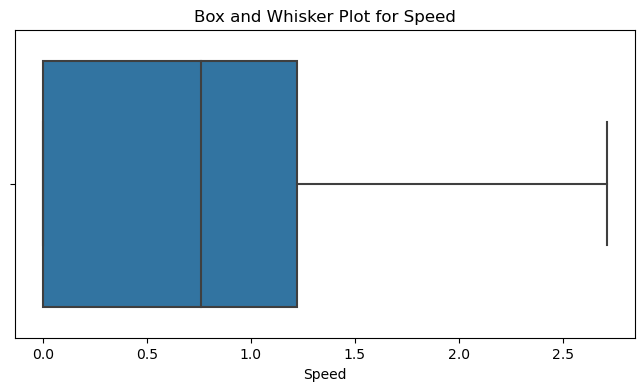

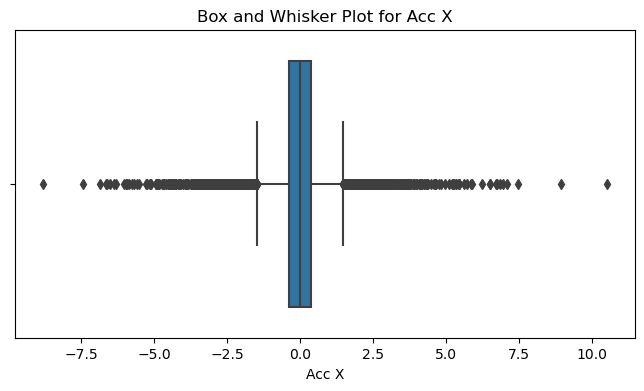

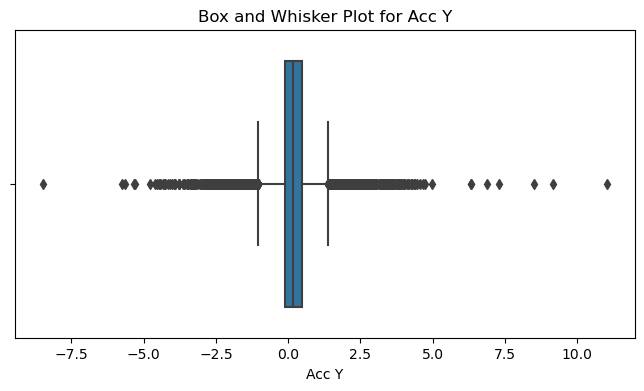

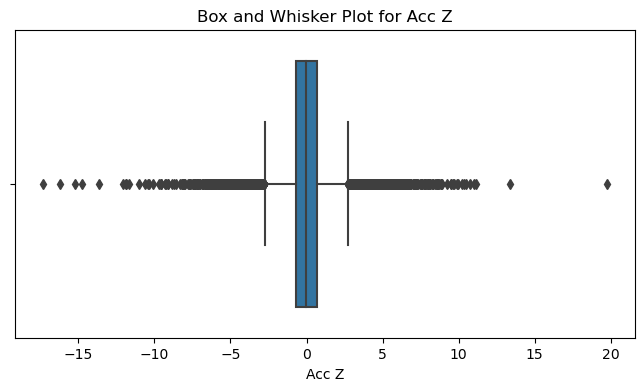

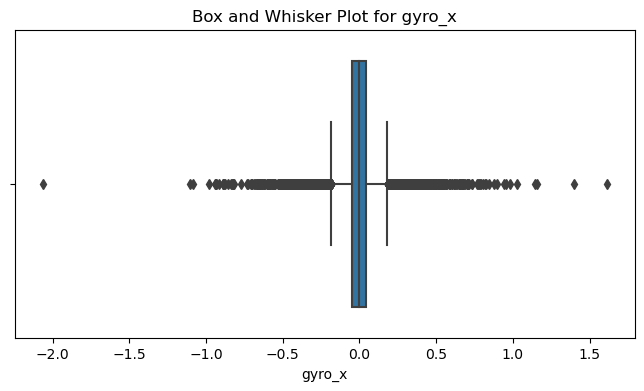

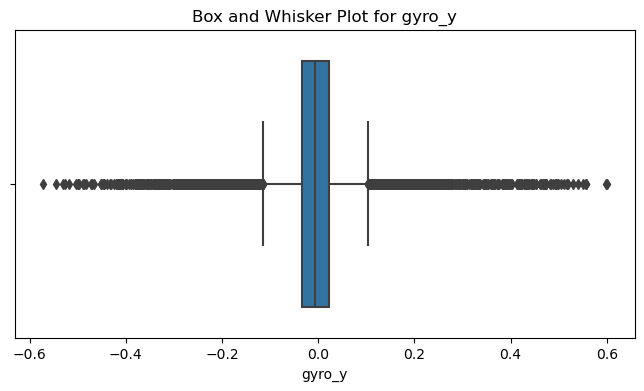

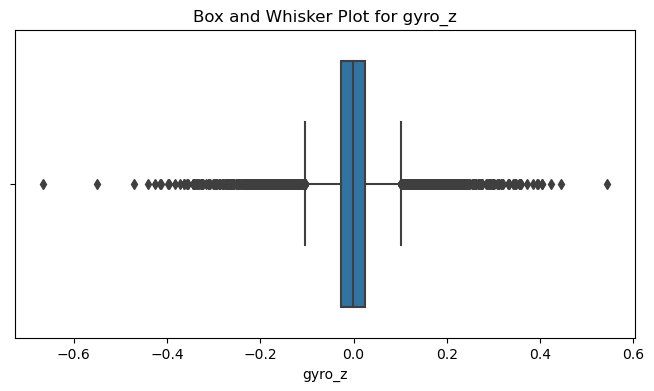

In [6]:
# 2. Exploratory Data Analysis (EDA) and Data Preprocessing
# Check for missing values and data types
print("Dataset Information:")
print(df.info())

print("\nMissing Values Count:")
print(df.isnull().sum())

# Drop or fill missing values as required (example: forward fill missing data)
df.fillna(method='ffill', inplace=True)

# Statistical summary
print("\nSummary Statistics:")
print(df.describe())

# Plotting distributions for key sensor data (Box and Whisker plot for outliers)
import seaborn as sns
import matplotlib.pyplot as plt

# Detecting outliers using separate Box and Whisker’s plot for each variable
# List of relevant columns (based on the dataset structure)
sensor_columns = ['Speed', 'Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z']

# Plot separate Box and Whisker plots for each column
for col in sensor_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box and Whisker Plot for {col}")
    plt.show()


In [7]:
#Feature Engineering and Data Augmentation
#new features (e.g., speed changes, sudden stops, direction changes).

In [8]:
#Calculate Speed Change & Direction Change
# Speed change (difference between consecutive rows)
df['Speed_Change'] = df['Speed'].diff()

# Direction change (Heading difference)
df['Direction_Change'] = df['Heading'].diff().fillna(0)

# Convert Time column to a proper datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H-%M-%S')
df['Time_Change'] = (df['Time'].diff().dt.total_seconds()).fillna(0)
# Acceleration Rate and Braking Intensity
df['Acceleration_Rate'] = df['Speed_Change'] / df['Time_Change']
df['Braking_Intensity'] = df['Acceleration_Rate'].apply(lambda x: x if x < 0 else 0)


#Jerk (Rate of Change of Acceleration)
df['Acc_Magnitude'] = np.sqrt(df['Acc X']**2 + df['Acc Y']**2 + df['Acc Z']**2)
df['Jerk'] = df['Acc_Magnitude'].diff() / df['Time_Change']

# Cumulative Distance and Speed Variance
df['Cumulative_Distance'] = df['Distance'].cumsum()
df['Speed_Variance'] = df['Speed'].rolling(window=5).var()


In [9]:
# Save the updated dataset
df.to_csv('augmented_dataset.csv', index=False)

# From Group 2

# Tasks done by me  : - 

# Task 1 (16/10/24)

                        Speed  Total_Acc  Total_Gyro  Speed_Change  \
Speed                1.000000  -0.018831   -0.013792      0.025431   
Total_Acc           -0.018831   1.000000    0.637592      0.005097   
Total_Gyro          -0.013792   0.637592    1.000000      0.004161   
Speed_Change         0.025431   0.005097    0.004161      1.000000   
Direction_Change    -0.000542   0.009856    0.010057      0.007782   
Rolling_Acc_X_Mean  -0.031120   0.009594   -0.002000      0.002054   
Rolling_Acc_Y_Mean  -0.013640   0.047044    0.010614      0.004327   
Rolling_Acc_Z_Mean  -0.029118  -0.039047   -0.006174     -0.006443   
Rolling_Gyro_X_Mean  0.018561  -0.011488   -0.001484      0.003052   
Rolling_Gyro_Y_Mean  0.019565   0.003272   -0.012431      0.002369   
Rolling_Gyro_Z_Mean  0.036897  -0.033848   -0.034480      0.002809   

                     Direction_Change  Rolling_Acc_X_Mean  Rolling_Acc_Y_Mean  \
Speed                       -0.000542           -0.031120           -0.013640 

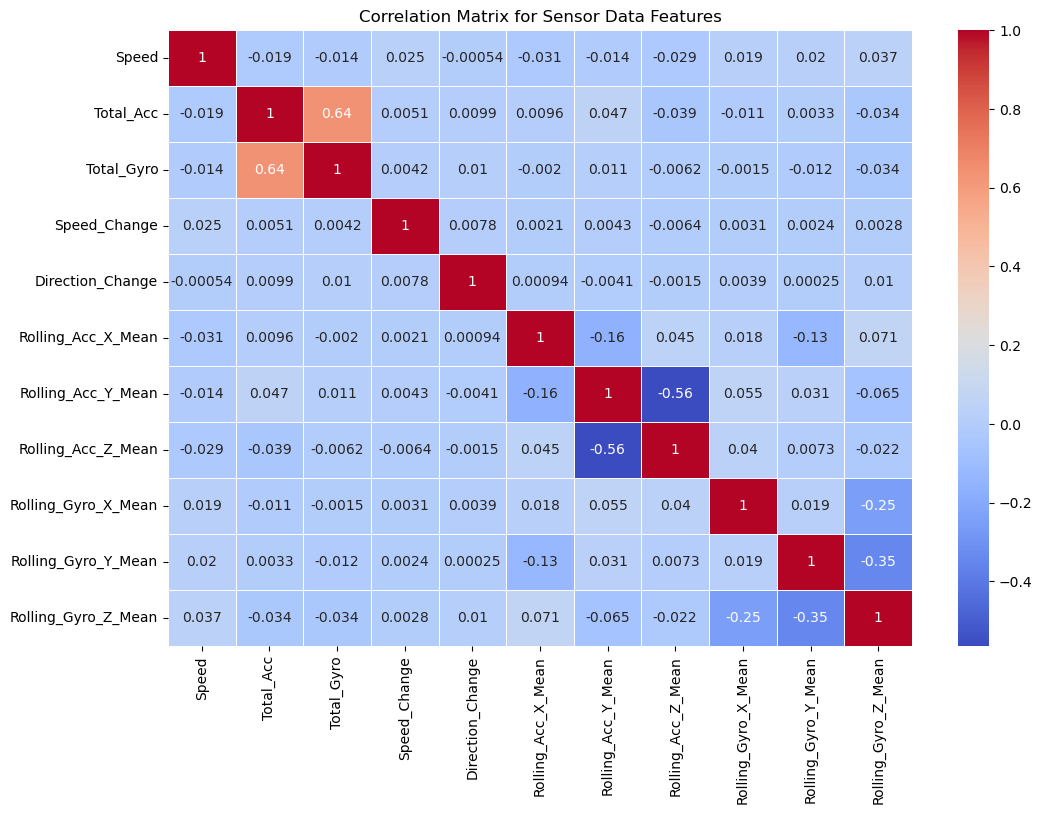

In [10]:

# Window size for rolling operations (e.g., 5 time steps)
window_size = 5

# Rolling mean for accelerometer data (X, Y, Z)
df['Rolling_Acc_X_Mean'] = df['Acc X'].rolling(window=window_size).mean()
df['Rolling_Acc_Y_Mean'] = df['Acc Y'].rolling(window=window_size).mean()
df['Rolling_Acc_Z_Mean'] = df['Acc Z'].rolling(window=window_size).mean()

# Rolling variance for accelerometer data (X, Y, Z)
df['Rolling_Acc_X_Var'] = df['Acc X'].rolling(window=window_size).var()
df['Rolling_Acc_Y_Var'] = df['Acc Y'].rolling(window=window_size).var()
df['Rolling_Acc_Z_Var'] = df['Acc Z'].rolling(window=window_size).var()


# Rolling mean for gyroscope data (X, Y, Z)
df['Rolling_Gyro_X_Mean'] = df['gyro_x'].rolling(window=window_size).mean()
df['Rolling_Gyro_Y_Mean'] = df['gyro_y'].rolling(window=window_size).mean()
df['Rolling_Gyro_Z_Mean'] = df['gyro_z'].rolling(window=window_size).mean()

# Rolling variance for gyroscope data (X, Y, Z)
df['Rolling_Gyro_X_Var'] = df['gyro_x'].rolling(window=window_size).var()
df['Rolling_Gyro_Y_Var'] = df['gyro_y'].rolling(window=window_size).var()
df['Rolling_Gyro_Z_Var'] = df['gyro_z'].rolling(window=window_size).var()


# Total acceleration magnitude using X, Y, Z components
df['Total_Acc'] = np.sqrt(df['Acc X']**2 + df['Acc Y']**2 + df['Acc Z']**2)



# Total gyroscope magnitude using X, Y, Z components
df['Total_Gyro'] = np.sqrt(df['gyro_x']**2 + df['gyro_y']**2 + df['gyro_z']**2)


# Calculate correlation matrix
correlation_matrix = df[['Speed', 'Total_Acc', 'Total_Gyro', 'Speed_Change', 
                         'Direction_Change', 'Rolling_Acc_X_Mean', 'Rolling_Acc_Y_Mean', 
                         'Rolling_Acc_Z_Mean', 'Rolling_Gyro_X_Mean', 'Rolling_Gyro_Y_Mean', 
                         'Rolling_Gyro_Z_Mean']].corr()

# Display the correlation matrix
print(correlation_matrix)



import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sensor Data Features')
plt.show()


# Feature Engineering and Data Augmentation Report

### Introduction

The purpose of this report is to document the feature engineering process for detecting anomalies using smartphone sensor data in crowded environments. Anomalies in this context can include unusual or unexpected movements such as sudden stops, sharp turns, excessive acceleration, or erratic behavior. By analyzing data from smartphone sensors like accelerometers, gyroscopes, and GPS, we can identify and flag these anomalies.

The data collected from sensors includes measurements such as:

    i.Longitude & Latitude (GPS-based location data)
    ii.Speed (derived from GPS data)
    iii.Accelerometer data (X, Y, Z) – Measures linear acceleration along three axes
    iv.Gyroscope data (X, Y, Z) – Measures angular velocity around three axes
    v.Heading (Direction of movement)
    vi.Time (Timestamps of data collection)





### New Features Created

    1. Speed Change
 Description:Measures the difference in speed between consecutive time steps to detect rapid accelerations or sudden stops.

In [11]:
df['Speed_Change'] = df['Speed'].diff()


Use Case: Large speed changes within short time periods (e.g., sudden acceleration or deceleration) may indicate abnormal behavior such as running in a crowd or an unexpected halt.

2. Direction Change

Description: Captures the change in heading between consecutive time steps, useful for detecting sharp turns or erratic movements.


In [12]:
df['Direction_Change'] = df['Heading'].diff().fillna(0)


Use Case: Sudden or frequent changes in direction can indicate erratic behavior or potentially evasive movement in a crowd.


3. Time Difference

Description: Time difference between consecutive readings. 

A large or inconsistent time gap might indicate data collection issues or sudden stops.


In [13]:
df['Time'] = pd.to_datetime(df['Time'], format='%H-%M-%S')
df['Time_Change'] = df['Time'].diff().dt.total_seconds().fillna(0)


Use Case: Time changes help in calculating time-based features such as speed or acceleration over time.

4. Acceleration Rate and Braking Intensity

Description: Acceleration rate is derived by dividing speed change by time change, while braking intensity isolates negative acceleration (deceleration).

In [14]:
df['Acceleration_Rate'] = df['Speed_Change'] / df['Time_Change']
df['Braking_Intensity'] = df['Acceleration_Rate'].apply(lambda x: x if x < 0 else 0)

Use Case: Can help in identifying instances of aggressive acceleration and braking behavior, which may be anomalous in crowd movement.

5. Acceleration Magnitude

Description: This feature calculates the magnitude of acceleration using the X, Y, and Z components of the accelerometer.


In [15]:
df['Acc_Magnitude'] = np.sqrt(df['Acc X']**2 + df['Acc Y']**2 + df['Acc Z']**2)


Use Case:A sudden increase in acceleration magnitude followed by a sharp decline could indicate a trip or a fall in a crowded area.

6. Jerk (Rate of Change of Acceleration)

Description: This feature measures the rate of change of the total acceleration magnitude over time, which can be used to detect sudden changes in motion.


In [16]:
df['Jerk'] = df['Acc_Magnitude'].diff() / df['Time_Change']


Use Case: Detects sharp or sudden movements, like jerks, which may indicate abnormal or erratic behavior in a crowd.

7. Cumulative Distance

Description: This feature tracks the total distance traveled by summing up the distance values over time.


In [17]:
df['Cumulative_Distance'] = df['Distance'].cumsum()


Use Case: Useful for tracking overall movement trends and identifying anomalies where there is unexpected stopping or erratic travel behavior

8. Speed Variance

Description: This feature calculates the rolling variance of speed over a defined window (e.g., 5 time points).


In [18]:
df['Speed_Variance'] = df['Speed'].rolling(window=5).var()


Use Case: Identifies periods of unstable movement by highlighting variations in speed over time.


9.Rolling Mean and Variance for Sensor Data

Accelerometer and Gyroscope Data:

Rolling means and variances were computed for the accelerometer (X, Y, Z) and gyroscope (X, Y, Z) data to smooth the data and reveal trends.


In [19]:
window_size = 5
# Rolling mean and variance for accelerometer data
df['Rolling_Acc_X_Mean'] = df['Acc X'].rolling(window=window_size).mean()
df['Rolling_Acc_Y_Mean'] = df['Acc Y'].rolling(window=window_size).mean()
df['Rolling_Acc_Z_Mean'] = df['Acc Z'].rolling(window=window_size).mean()
df['Rolling_Acc_X_Var'] = df['Acc X'].rolling(window=window_size).var()
df['Rolling_Acc_Y_Var'] = df['Acc Y'].rolling(window=window_size).var()
df['Rolling_Acc_Z_Var'] = df['Acc Z'].rolling(window=window_size).var()

# Rolling mean and variance for gyroscope data
df['Rolling_Gyro_X_Mean'] = df['gyro_x'].rolling(window=window_size).mean()
df['Rolling_Gyro_Y_Mean'] = df['gyro_y'].rolling(window=window_size).mean()
df['Rolling_Gyro_Z_Mean'] = df['gyro_z'].rolling(window=window_size).mean()
df['Rolling_Gyro_X_Var'] = df['gyro_x'].rolling(window=window_size).var()
df['Rolling_Gyro_Y_Var'] = df['gyro_y'].rolling(window=window_size).var()
df['Rolling_Gyro_Z_Var'] = df['gyro_z'].rolling(window=window_size).var()



10. Total Acceleration and Gyroscope Magnitudes

Description: Magnitudes of acceleration and gyroscope data computed using the Euclidean formula.

In [20]:
df['Total_Acc'] = np.sqrt(df['Acc X']**2 + df['Acc Y']**2 + df['Acc Z']**2)
df['Total_Gyro'] = np.sqrt(df['gyro_x']**2 + df['gyro_y']**2 + df['gyro_z']**2)


## Correlation Analysis

To assess the relationships between the newly engineered features and existing features, a correlation matrix was computed. The correlation matrix helps to identify strong relationships that could indicate potential anomalies in behavior.

In [21]:
correlation_matrix = df[['Speed', 'Total_Acc', 'Total_Gyro', 'Speed_Change', 
                         'Direction_Change', 'Rolling_Acc_X_Mean', 'Rolling_Acc_Y_Mean', 
                         'Rolling_Acc_Z_Mean', 'Rolling_Gyro_X_Mean', 'Rolling_Gyro_Y_Mean', 
                         'Rolling_Gyro_Z_Mean']].corr()


## Visualization of Correlation Matrix

A heatmap of the correlation matrix was plotted for better visual interpretation of the relationships between features.

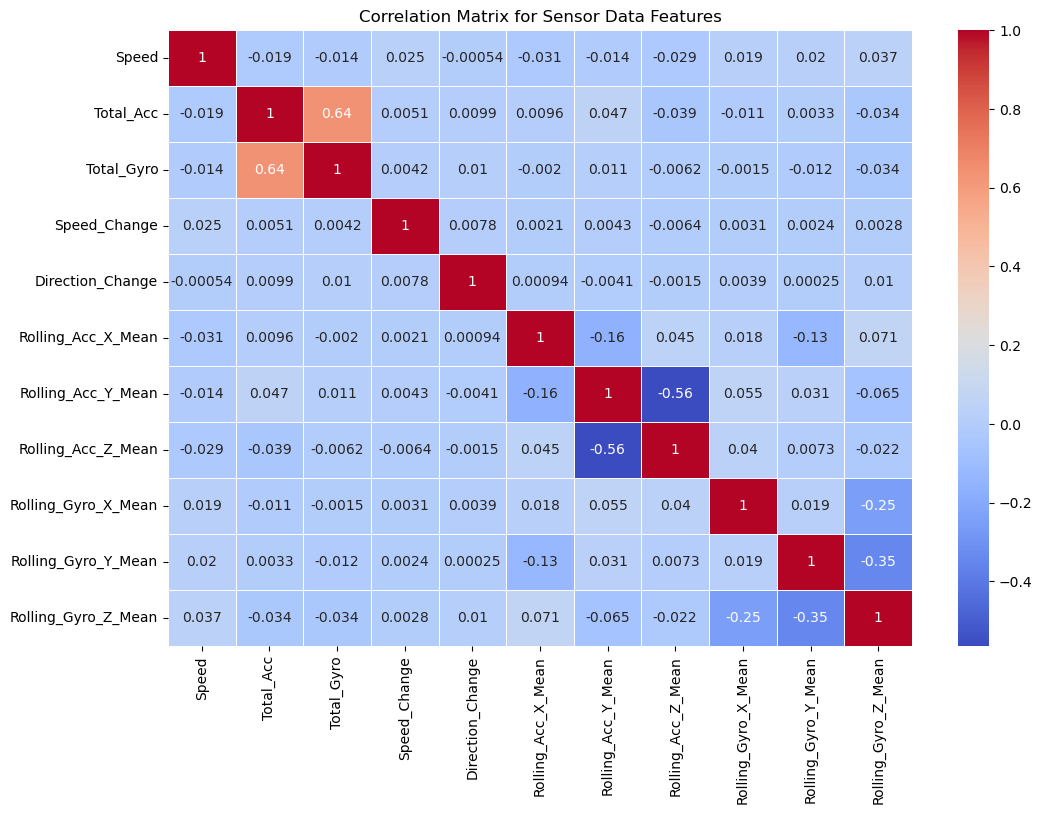

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Sensor Data Features')
plt.show()


## Conclusion:

The newly created features provide valuable insights into the movement patterns captured by smartphone sensors. The metrics for speed change, direction change, acceleration rate, braking intensity, and jerk will be instrumental in analyzing dynamic behavior and detecting anomalies in crowds. Further analysis can be conducted to derive actionable insights based on the relationships revealed in the correlation analysis.

# Task 2 -To flag anomalies (17/10/24) and Task 3 - Visualize anomalies using time-series plots and scatter plots (18/10/24) - 

Z-Score Detection Results:
       Longitude   Latitude  Speed   Distance                Time     Acc X  \
0      73.822661  18.501627    0.0     0.0000 1900-01-01 18:45:12  0.046402   
1      73.822661  18.501627    0.0     0.0000 1900-01-01 18:45:12 -0.136978   
2      73.822661  18.501627    0.0     0.0000 1900-01-01 18:45:13 -0.045355   
3      73.822661  18.501627    0.0     0.0000 1900-01-01 18:45:13  0.242089   
4      73.822661  18.501627    0.0     0.0000 1900-01-01 18:45:13 -0.230234   
...          ...        ...    ...        ...                 ...       ...   
14244  73.822813  18.501587    0.0  2096.5732 1900-01-01 17:27:34 -0.436406   
14245  73.822813  18.501587    0.0  2096.5732 1900-01-01 17:27:34 -0.436406   
14246  73.822813  18.501587    0.0  2096.5732 1900-01-01 17:27:34 -0.436406   
14247  73.822813  18.501587    0.0  2096.5732 1900-01-01 17:27:34 -0.436406   
14248  73.822813  18.501587    0.0  2096.5732 1900-01-01 17:27:35 -0.436406   

          Acc Y     Acc 

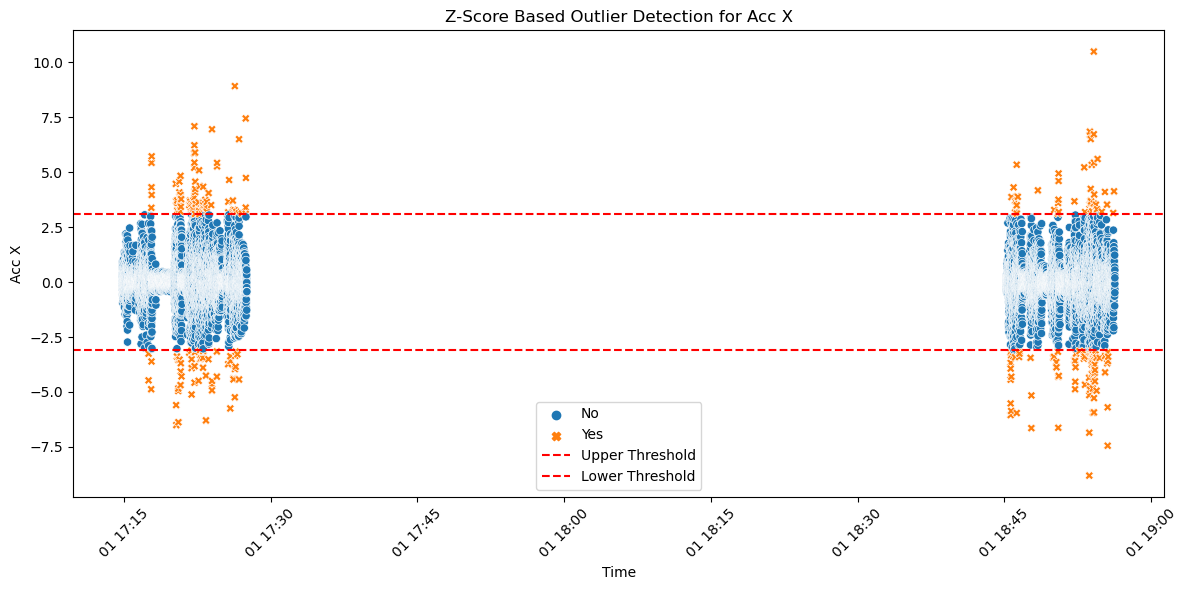

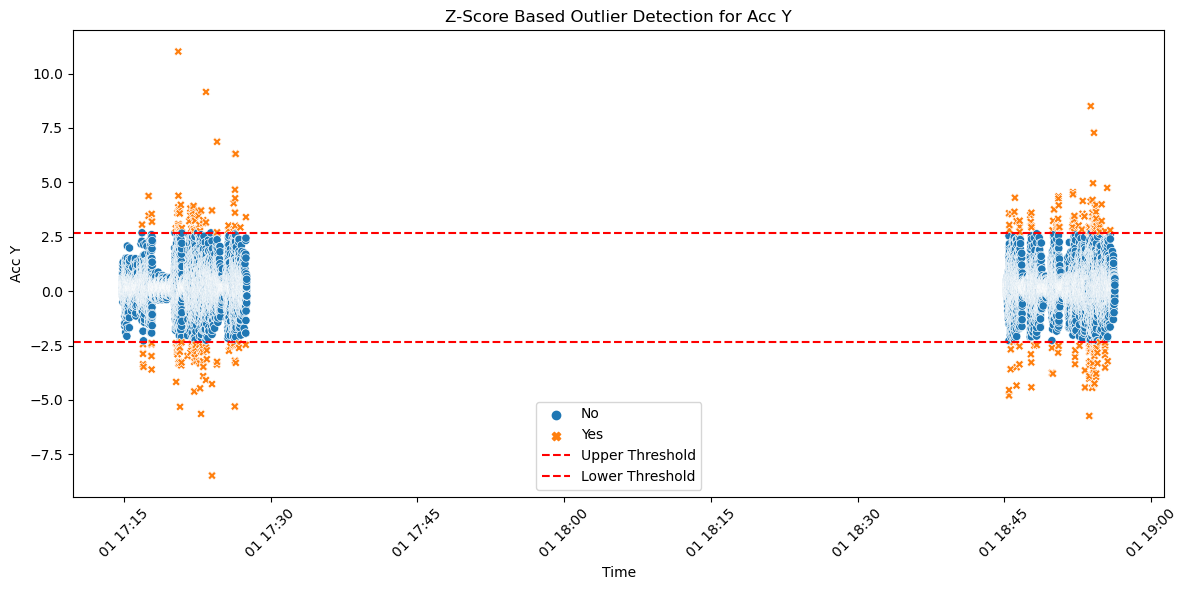

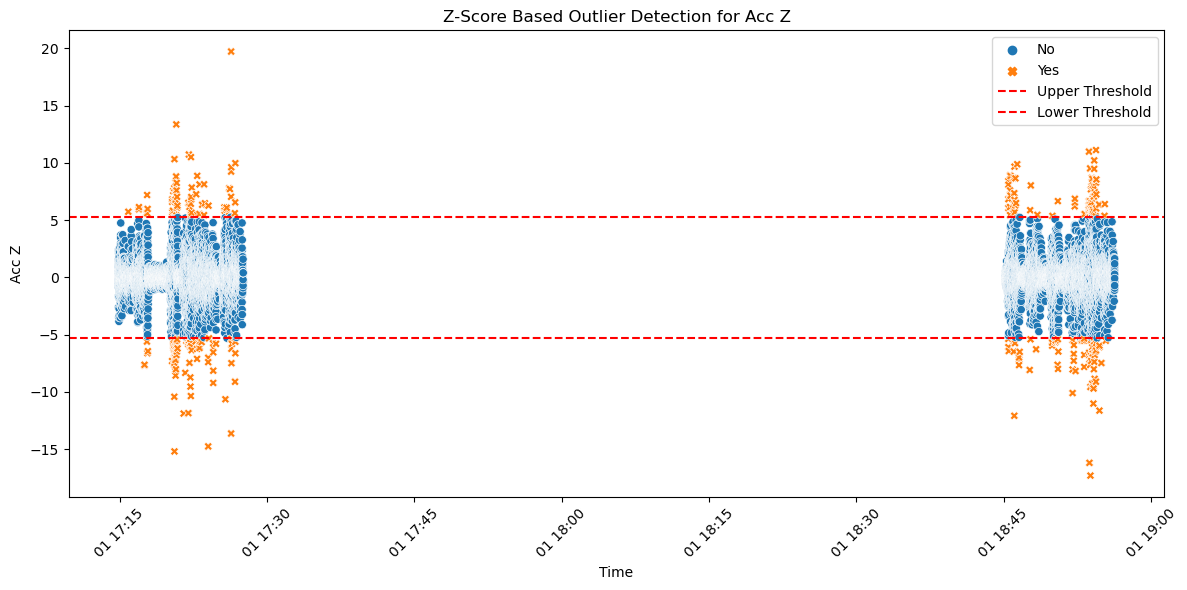

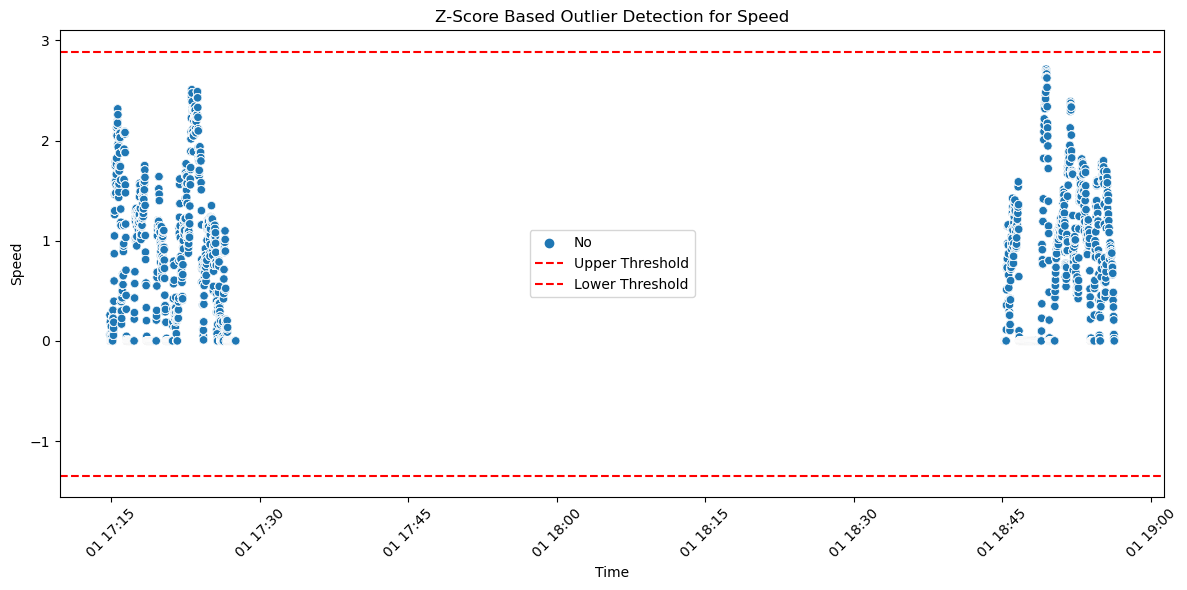

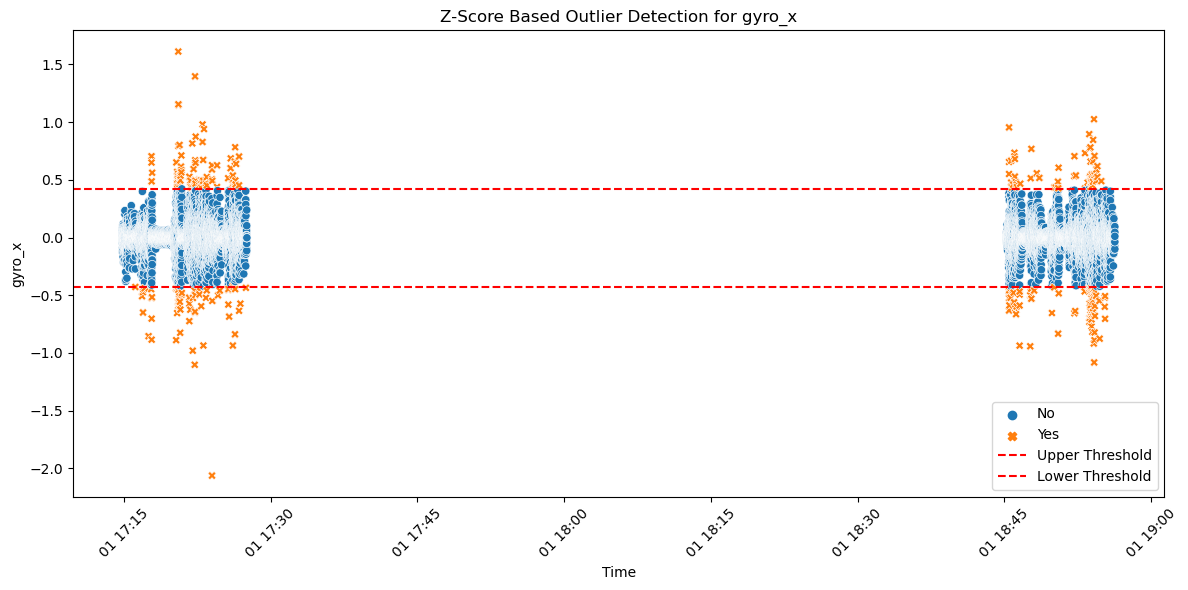

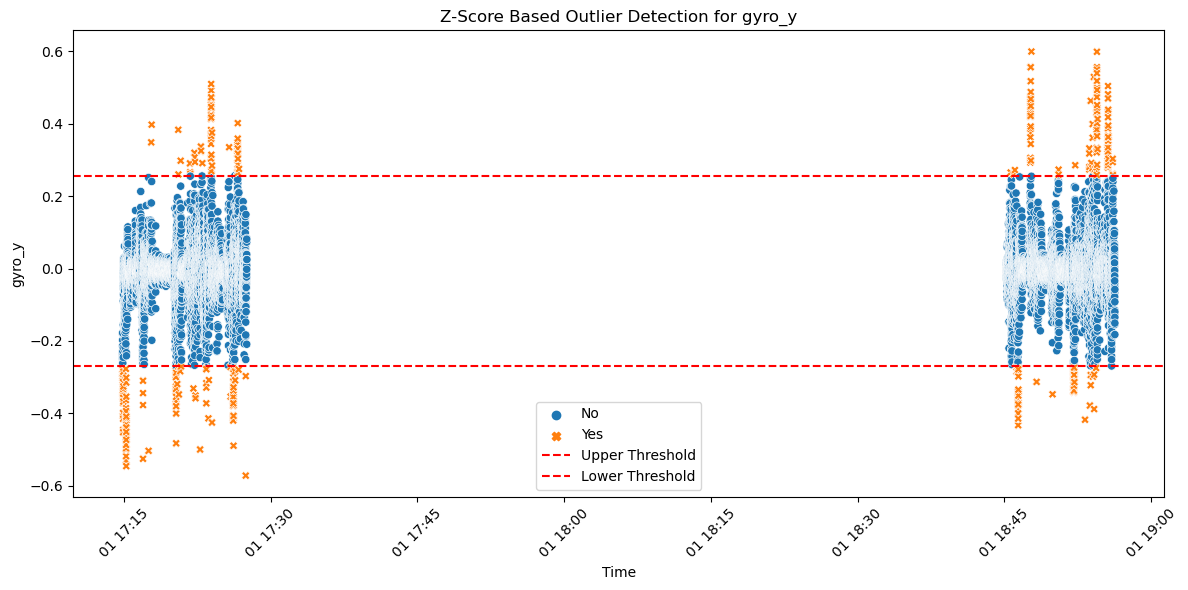

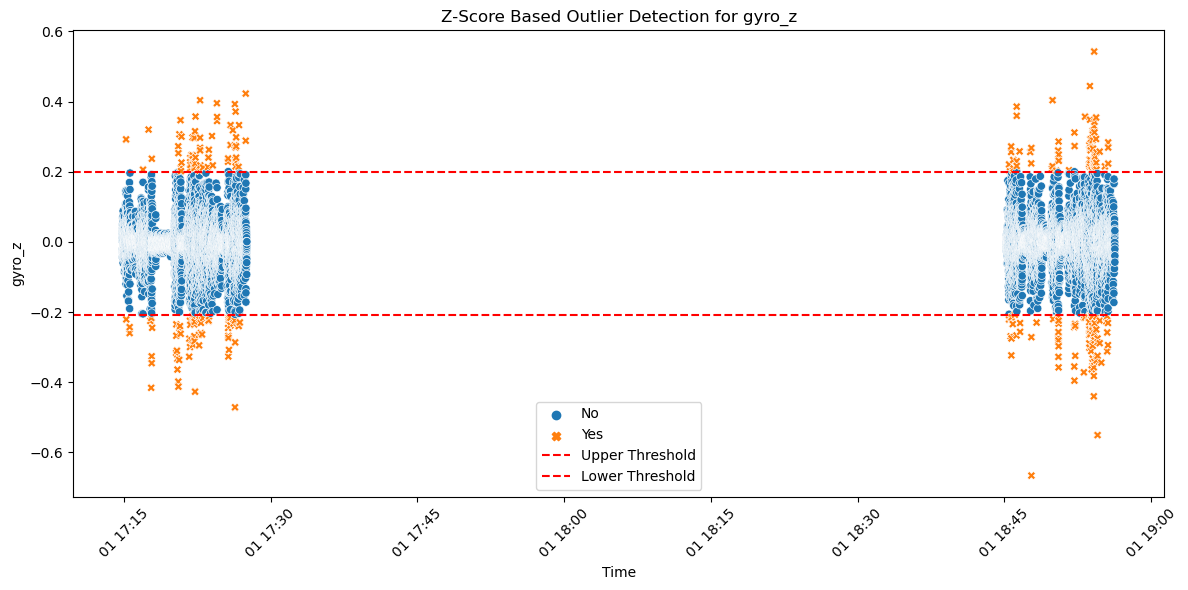

In [25]:
# Visualize anomalies using time-series plots and scatter plots.

# Define a function for Z-score calculation and anomaly detection
def calculate_z_scores(df, column_name):
    mean = df[column_name].mean()
    std = df[column_name].std()
    z_scores = (df[column_name] - mean) / std          # Z= (X-mean)/sd
    df[f'Z-Score_{column_name}'] = z_scores
    df[f'Anomaly_{column_name}'] = z_scores.apply(lambda x: 'Yes' if abs(x) > 3 else 'No')

# List of parameters for which to calculate Z-scores
parameters = ['Acc X', 'Acc Y', 'Acc Z', 'Speed', 'gyro_x', 'gyro_y', 'gyro_z']

# Calculate Z-scores for each parameter
for param in parameters:
    calculate_z_scores(df, param)

# Display the results
print("Z-Score Detection Results:")
print(df)

# Visualize Z-scores and anomalies for all features
for param in parameters:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Time', y=param, hue=f'Anomaly_{param}', style=f'Anomaly_{param}', data=df)
    plt.axhline(y=df[param].mean() + 3 * df[param].std(), color='r', linestyle='--', label='Upper Threshold')
    plt.axhline(y=df[param].mean() - 3 * df[param].std(), color='r', linestyle='--', label='Lower Threshold')
    plt.title(f'Z-Score Based Outlier Detection for {param}')
    plt.xlabel('Time')
    plt.ylabel(param)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    
# In a normal distribution:
# Approximately 68% of the data falls within 1 standard deviation from the mean.
# Approximately 95% of the data falls within 2 standard deviations from the mean.
# Approximately 99.7% of the data falls within 3 standard deviations from the mean.
# Thus, if a data point has a Z-score greater than 3 or less than -3, it is considered an outlier since it falls outside the range where 99.7% of the data points lie.


# For Task 4 :  I along with Harshit Jain had created the report - Comparative Report on IQR vs Z score (uploaded on Github)   (21/10/24)

# On 22/10/24 - I had done and explained the comparison between Z Score, IQR, and LOF from LOF Report (uploaded)

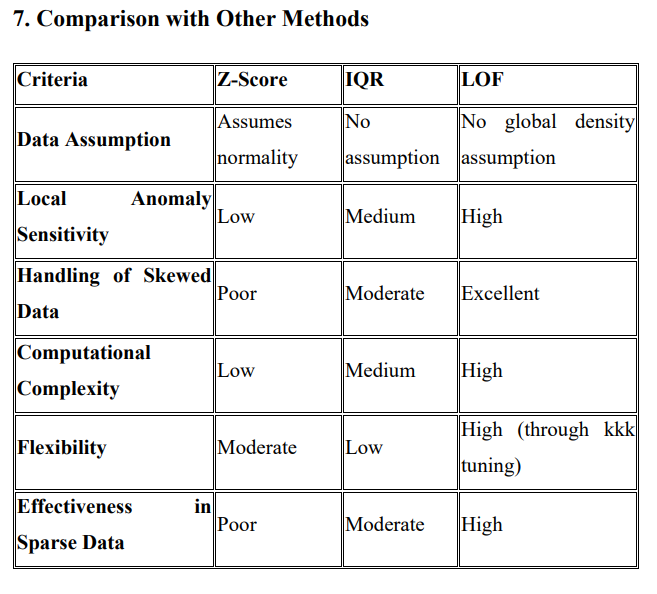

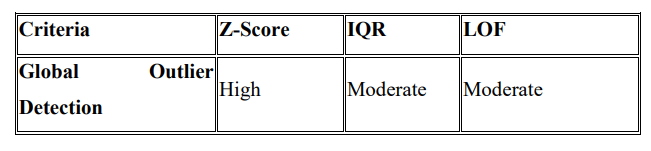

# Task 5 (23/10/24) :

# Step 5: Visualize Confusion Matrix for Isolation Forest 


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_iso, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix for Isolation Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


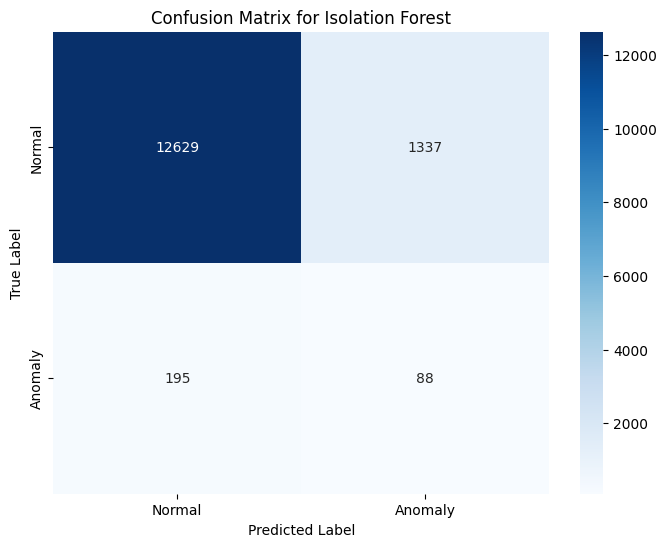

# Task 6 (24/10/24)

# Step 4: Compare Results with Previous Methods (IQR, Z-Score)

To gauge the performance of Isolation Forest relative to previous methods, calculate and compare precision, recall, and F1-score values for IQR and Z-score methods. This comparison will highlight which technique offers the most accurate anomaly detection.

In [ ]:
# Classification reports for IQR and Z-Score
iqr_report = classification_report(data['true_anomaly'], data['IQR_anomaly'], target_names=['Normal', 'Anomaly'])
z_score_report = classification_report(data['true_anomaly'], data['Z_Score_anomaly'], target_names=['Normal', 'Anomaly'])

print("IQR Classification Report:\n", iqr_report)
print("Z-Score Classification Report:\n", z_score_report)

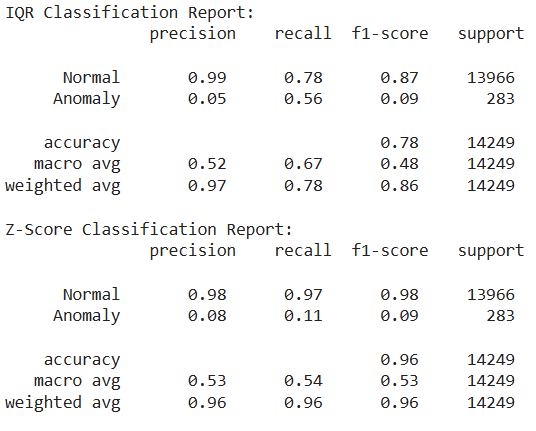

# Task 7 (28/10/24)

## Documented the above Step 4: Compare Results with Previous Methods (IQR, Z-Score) in Performance Analysis for Isolation Forest.pdf (uploaded)

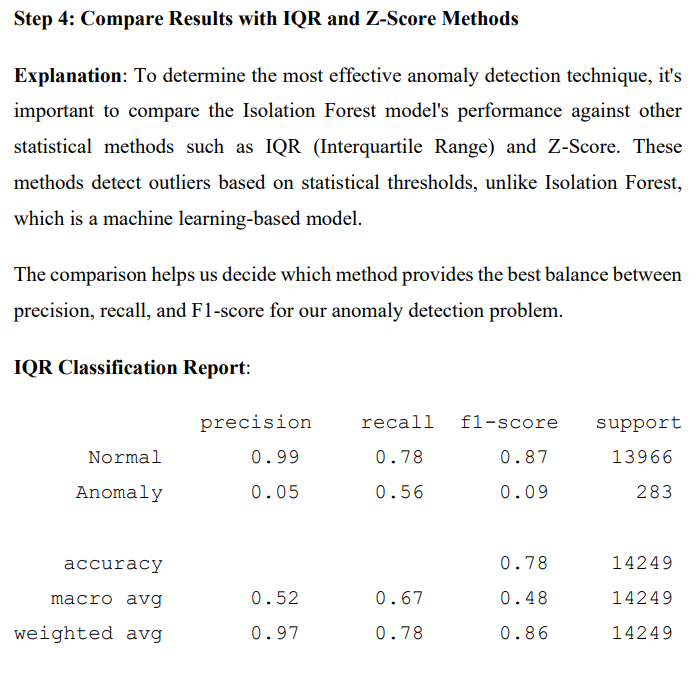

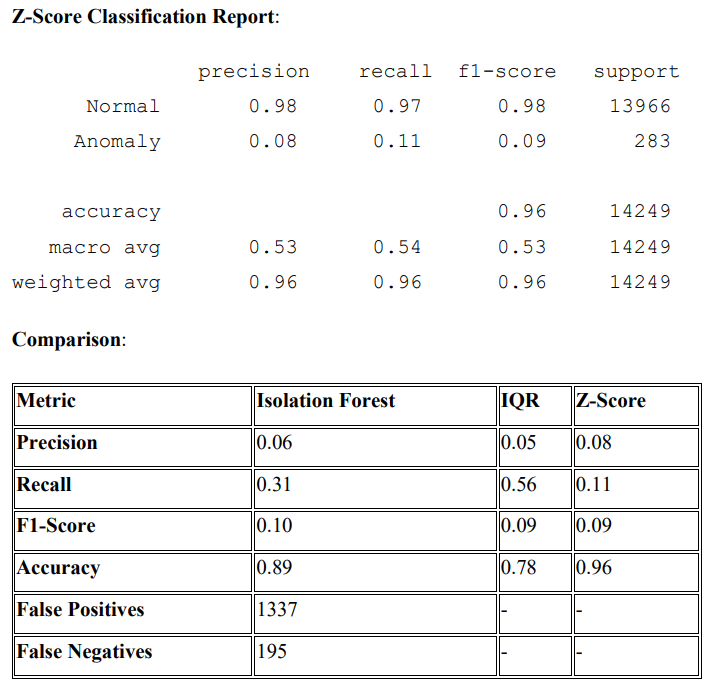

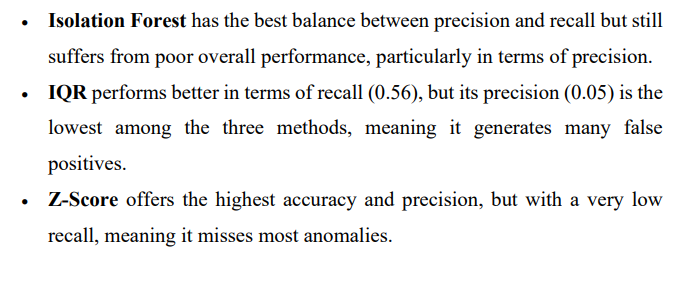

## Task 9 (5/11/24) - Summarized the concepts 

## Task 10 (06/11/24) - 

## Step 3: Comparing Detected Anomalies with Actual Anomalies

### This plot compares detected anomalies from Isolation Forest and LOF with actual anomalies recorded in the dataset.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plotting points with different colors for detected anomalies vs. normal points
plt.scatter(data[data['iso_forest_anomaly'] == 1]['PCA1'], data[data['iso_forest_anomaly'] == 1]['PCA2'],
            color='blue', label='Isolation Forest Anomalies', alpha=0.5)
plt.scatter(data[data['lof_score'] < -1.5]['PCA1'], data[data['lof_score'] < -1.5]['PCA2'],
            color='red', label='LOF Anomalies', alpha=0.5)
plt.scatter(data[(data['iso_forest_anomaly'] == 0) & (data['lof_score'] >= -1.5)]['PCA1'],
            data[(data['iso_forest_anomaly'] == 0) & (data['lof_score'] >= -1.5)]['PCA2'],
            color='green', label='Normal Points', alpha=0.3)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Anomaly Clusters Detected by Isolation Forest and LOF')
plt.legend()
plt.show()


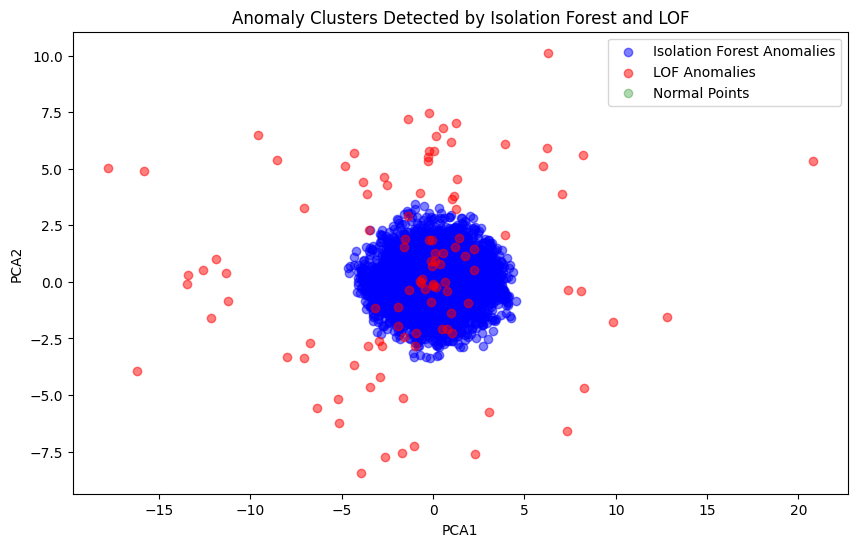